# Exercise 2 - Multi-class text classification Problem

GOAL: Use Supervised Machine Learning Methods and NLP to build a model that classifies new incoming "user complains" into one of the product categories.
      Target variable: Product
      Feature: "Consumer complaint narrative"

EXERCISE: 
    - Preprocess the dataset 
        NB: please notice that the TfidVectorized will not run locally on the whole dataset. The exercise will be presented on a non-random subsample of 5000 rows
        NBB: Select a RANDOM subsample of your choice 
    - Use TF-IDF for Text Representation
    - Using the Naive Bayes implementation as a guidance, apply other classification models to the problem.
    - Evaluate all the models used and identify the best one (Models benchmarking and comparison examples are included in the code)
    

# Walkthrough

#### Data Exploration
     - cutting dataset
#### Data Cleaning
     - checking for class imbalances
#### Text Representation
    - TF-IDF
    - Finding terms correlations
#### Classifier Implementation (Naive Bayes)
#### Multiple Model Implementation 
#### Benchmarking and Evaluation

### DATA EXPLORATION

In [378]:
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,12/31/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"Convergent Resources, Inc.",GA,NaN,NaN,NaN,Web,12/31/2018,Closed with explanation,Yes,NaN,3113161
1,12/31/2018,Vehicle loan or lease,Lease,Managing the loan or lease,Problem with fees charged,NaN,NaN,MERCEDES BENZ FINANCIAL SERVICES,CA,NaN,NaN,Other,Web,12/31/2018,In progress,Yes,NaN,3113131
2,12/31/2018,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"BCA Financial Services, Inc.",FL,336XX,NaN,NaN,Web,12/31/2018,In progress,Yes,NaN,3113586
3,12/31/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"Commonwealth Financial Systems, Inc.",GA,NaN,NaN,NaN,Web,12/31/2018,Closed with explanation,Yes,NaN,3113440
4,12/31/2018,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,NaN,NaN,AES/PHEAA,OR,NaN,NaN,NaN,Web,12/31/2018,Closed with explanation,Yes,NaN,3113157


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189771 entries, 0 to 1189770
Data columns (total 18 columns):
Date received                   1189771 non-null object
Product                         1189771 non-null object
Sub-product                     954605 non-null object
Issue                           1189771 non-null object
Sub-issue                       670648 non-null object
Consumer complaint narrative    354576 non-null object
Company public response         402196 non-null object
Company                         1189771 non-null object
State                           1173147 non-null object
ZIP code                        1091506 non-null object
Tags                            162567 non-null object
Consumer consent provided?      627943 non-null object
Submitted via                   1189771 non-null object
Date sent to company            1189771 non-null object
Company response to consumer    1189765 non-null object
Timely response?                1189771 non-null obje

In [3]:
#Running the exercise on the first 5000 rows
#df = df.head(5000)

In [376]:
#df= df.dropna()

In [381]:
df["Product"].value_counts()

Mortgage                                                                        270139
Debt collection                                                                 228398
Credit reporting, credit repair services, or other personal consumer reports    182035
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     48476
Credit card or prepaid card                                                      38973
Checking or savings account                                                      33344
Consumer Loan                                                                    31605
Vehicle loan or lease                                                             9430
Money transfer, virtual currency, or money 

### DATA CLEANING

In [382]:
df_new=df[["Product","Consumer complaint narrative"]]

In [383]:
df_cl=df_new.dropna() #remove missing values

In [384]:
sample_df=df_cl.sample(n=5000) #sample

In [385]:
sample_df.shape

(5000, 2)

In [386]:
#TO DO: Identify the target and the feature columns
sample_df["Product"].value_counts()

Debt collection                                                                 1115
Credit reporting, credit repair services, or other personal consumer reports    1093
Mortgage                                                                         719
Credit reporting                                                                 453
Credit card                                                                      292
Student loan                                                                     280
Credit card or prepaid card                                                      279
Bank account or service                                                          196
Consumer Loan                                                                    158
Checking or savings account                                                      150
Vehicle loan or lease                                                             77
Money transfer, virtual currency, or money service               

#### Checking for class imbalances
- TO DO: visualize the category frequency in the dataset 
NB: NO RESAMPLING METHOD IS IMPLEMENTED

the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

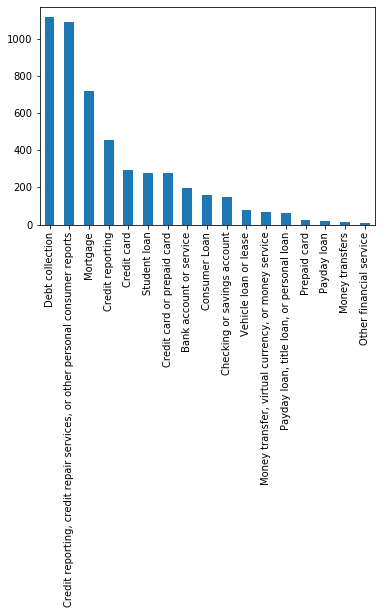

In [387]:
sample_df["Product"].value_counts().plot.bar()

In [388]:
import re
import nltk

In [389]:
STOP_WORDS = nltk.corpus.stopwords.words('english')

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = re.sub("[\d]+", "", sentence)
    sentence = re.sub("x[x]+", "", sentence)
    sentence = re.sub("\s\s+", " ", sentence)
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data[data['Consumer complaint narrative'] == data['Consumer complaint narrative']]  # removes nan since nan == nan -> False
    
    for col in ['Consumer complaint narrative']:
        data[col] = data[col].apply(clean_sentence)
    
    return data



In [390]:
sample_df = clean_dataframe(sample_df)
sample_df.head(5)

,Product,Consumer complaint narrative
550637,Consumer Loan,calling multiple times contacting family membe...
13947,Mortgage,payment made amount check clear bank payment s...
813836,Bank account or service,paypalebay inc auction transactions disputed ...
113915,Debt collection,received letter stating owed due unpaid medica...
192260,"Credit reporting, credit repair services, or o...",experian website claims temporarily lift secur...


In [391]:
#sample_df['Consumer complaint narrative'].iloc[7]

'used use card stopped card asked remaining balance clear right replied sir want close account plz make sure closed balance replied account closed balance quite may months store alaska closed store started getting letter mcm ca phone quoted info original creditor original ac mcm ac current owner current balance '

In [392]:
sample_df['category_id'] = sample_df['Product'].factorize()[0]
category_id_df = sample_df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
sample_df.head()

,Product,Consumer complaint narrative,category_id
550637,Consumer Loan,calling multiple times contacting family membe...,0
13947,Mortgage,payment made amount check clear bank payment s...,1
813836,Bank account or service,paypalebay inc auction transactions disputed ...,2
113915,Debt collection,received letter stating owed due unpaid medica...,3
192260,"Credit reporting, credit repair services, or o...",experian website claims temporarily lift secur...,4


### Text Representation

Raw text cannot be used for classification purposes. We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives. 
calculate a measure Term Frequency, Inverse Document Frequency

In [393]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TO DO: Implement the TfidVectorizer
#all our feature vectors have a euclidian norm of 1
#ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
#stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.
#min_df is the minimum numbers of documents a word must be present in to be kept.

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(sample_df["Consumer complaint narrative"]).toarray()
labels = sample_df.category_id

features.shape

(5000, 11859)

each of 5000 consumer complaint narratives is represented by 11859 features, representing the tf-idf score for different unigrams and bigrams.

#### Finding terms correlation with Chi2 test

In [394]:
#using sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products

from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. deposits
. overdraft
  . Most correlated bigrams:
. suntrust bank
. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. branch
. atm
  . Most correlated bigrams:
. checking account
. mobile deposit
# 'Consumer Loan':
  . Most correlated unigrams:
. vehicle
. car
  . Most correlated bigrams:
. payment car
. car loan
# 'Credit card':
  . Most correlated unigrams:
. purchases
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. amex
. card
  . Most correlated bigrams:
. gift card
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. equifax
. experian
  . Most correlated bigrams:
. free annual
. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiry
. equifax
  . Most correlated bigrams:
. mistakes appear
. appear report
# 'De

In [395]:
np.array(tfidf.get_feature_names())[np.argsort(chi2(features, labels == 1)[0])]

array(['payment reporting', 'received late', 'approach', ..., 'escrow',
       'modification', 'mortgage'], dtype='<U26')

In [397]:
chi2(features, labels)[0]

array([17.85443969,  3.16994329,  1.88724294, ...,  2.92594629,
        1.09285348,  1.47646017])

To train supervised classifiers, we first transformed the “Consumer complaint narrative” into a vector of numbers. We explored vector representations such as TF-IDF weighted vectors.
After having this vector representations of the text we can train supervised classifiers to train unseen “Consumer complaint narrative” and predict the “product” on which they fall.
After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

####   Classifier Implementation ( Naive Bayes)
#TO DO: implement a naive bayes classifier to predict df['product] from df['Consumer_complaint_narrative] - see the example for the implementation

In [398]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


X_train, X_test, y_train, y_test = train_test_split(sample_df['Consumer complaint narrative'], sample_df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)# fitting the training set


In [489]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [490]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


#### Multiple Model implementation

TO DO: implement and evaluate the perfomances of others classifiers. ( You're free to chose and compare. The exercise will feature Random Forest, Logistic Regression, Multinominal Naive Bayes and LSVM


C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

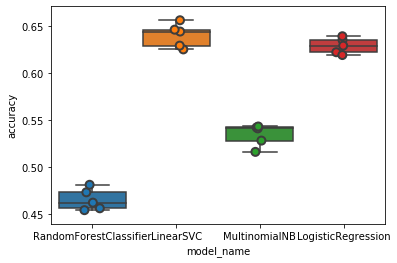

In [491]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# HINT: Use boxplots and stripplot below to compare the models
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()


In [369]:
# cv_df1.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.6220
LogisticRegression        0.6346
MultinomialNB             0.5564
RandomForestClassifier    0.4646
Name: accuracy, dtype: float64

In [403]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.6400
LogisticRegression        0.6288
MultinomialNB             0.5340
RandomForestClassifier    0.4652
Name: accuracy, dtype: float64

#### Model Evaluation Example

In [404]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, sample_df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


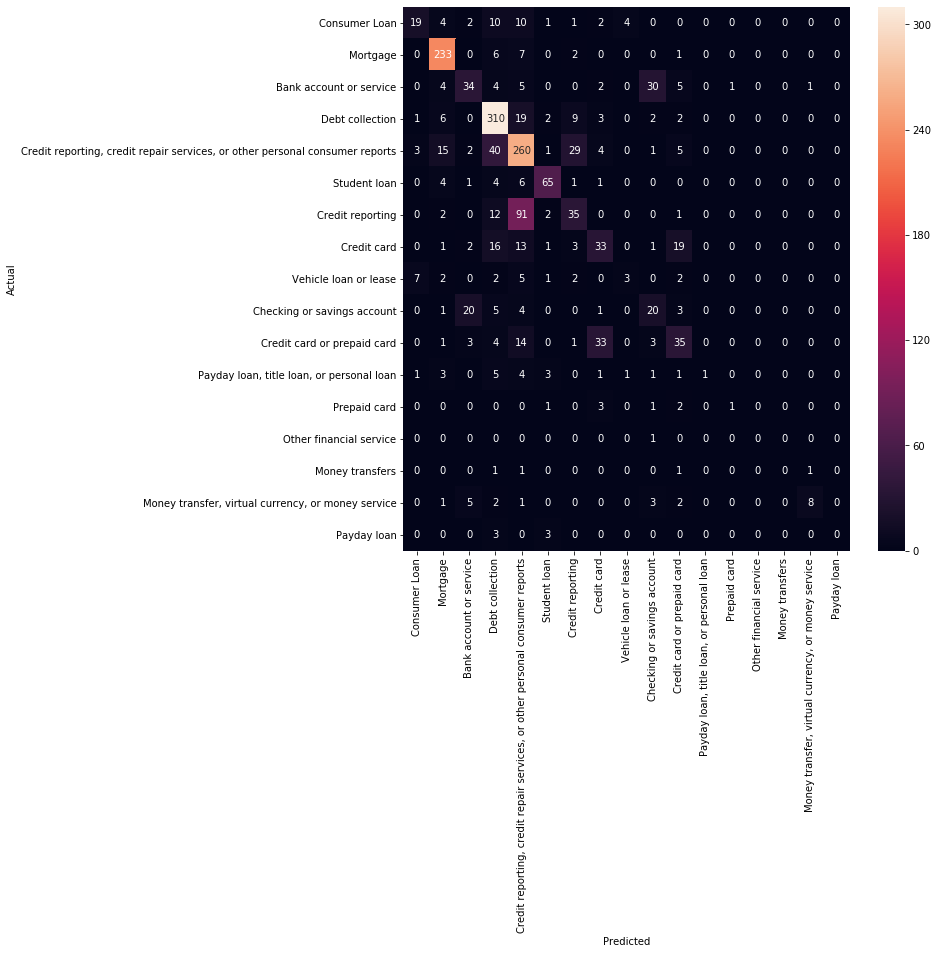

In [405]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be. However, there are a number of misclassifications, and it might be interesting to see what those are caused by:

In [493]:
from IPython.display import display
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(sample_df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer complaint narrative']])
            print('')

'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 12 examples.


,Product,Consumer complaint narrative
397181,"Credit reporting, credit repair services, or o...",chase mortgage housing settlement attorneys e...
43492,"Credit reporting, credit repair services, or o...",divorced ex spouse took control responsibility...
80846,"Credit reporting, credit repair services, or o...",regarding case case wells fargo done extra res...
338156,"Credit reporting, credit repair services, or o...",account number home equity line opened origin...
230235,"Credit reporting, credit repair services, or o...",paid mortgage check would accept check exact a...
203125,"Credit reporting, credit repair services, or o...",continuing issue posting payments time latest ...
179115,"Credit reporting, credit repair services, or o...",noted mortgage payment received days late rece...
192860,"Credit reporting, credit repair services, or o...",mortgage paid early full never years missed la...
402467,"Credit reporting, credit repair services, or o...",information credit report accurate shows paid ...
280830,"Credit reporting, credit repair services, or o...",experian refuses remove credit report sold lie...



'Checking or savings account' predicted as 'Bank account or service' : 16 examples.


,Product,Consumer complaint narrative
406753,Checking or savings account,wednesday morning deposited paycheck suntrust ...
252858,Checking or savings account,went atm tried withdraw funds checking account...
241850,Checking or savings account,opened fraud cases use atm card lost pin repor...
264243,Checking or savings account,scammed people presenting loan representatives...
415241,Checking or savings account,accounts please read bottom wells fargo accoun...
128735,Checking or savings account,started notice deposited money checking accoun...
294685,Checking or savings account,action td bank called around spoke representat...
124870,Checking or savings account,recently initiated echeck payment credit card ...
241890,Checking or savings account,went atm machine pnc bank oh total withdrew le...
380611,Checking or savings account,hidden fees aware instead rejecting invalid un...



'Consumer Loan' predicted as 'Debt collection' : 11 examples.


,Product,Consumer complaint narrative
675814,Consumer Loan,take loan time really desperate money deposite...
638355,Consumer Loan,received multiple calls regional finance place...
541602,Consumer Loan,well fargo repossessed car false reason insura...
711025,Consumer Loan,receiving phone calls ranging times day day pa...
753242,Consumer Loan,went tn purchase came time get finance dept ge...
470385,Consumer Loan,ally financial late payments fees understand p...
502819,Consumer Loan,filed chapter bankruptcy protection included a...
639558,Consumer Loan,receiv threating letter ncb management service...
478026,Consumer Loan,told ncb management services inc filed law sui...
705241,Consumer Loan,got loan turbo tittle loan six months later go...



'Mortgage' predicted as 'Debt collection' : 14 examples.


,Product,Consumer complaint narrative
55804,Mortgage,loan paying time number years economy took div...
65340,Mortgage,received letter ditech financial llc dated sai...
788339,Mortgage,greentree cease notice file result previous co...
702126,Mortgage,several recent attempts made creditor settle d...
771894,Mortgage,husband process buying home working nmls submi...
64047,Mortgage,reference complaint addendum representative ca...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 36 examples.


,Product,Consumer complaint narrative
311673,"Credit reporting, credit repair services, or o...",contacted equifax disputing error report colle...
272787,"Credit reporting, credit repair services, or o...",reporting owed equifax reports x longer liabl...
370001,"Credit reporting, credit repair services, or o...",wage earner protection rights violated wage ea...
355226,"Credit reporting, credit repair services, or o...",midwest recovery system fraudulently reported ...
56107,"Credit reporting, credit repair services, or o...",quite sure companies following proper reportin...
70745,"Credit reporting, credit repair services, or o...",writing dispute account referenced disputed ac...
211937,"Credit reporting, credit repair services, or o...",filed bk chapter discharged case number
342171,"Credit reporting, credit repair services, or o...",three companies would remove erroneous items a...
177290,"Credit reporting, credit repair services, or o...",hello seeking resolutions handling fcra violat...
398945,"Credit reporting, credit repair services, or o...",credit reporting gency reporting debt collecto...



'Credit reporting' predicted as 'Debt collection' : 13 examples.


,Product,Consumer complaint narrative
795997,Credit reporting,filed complaint collection agency tx agency co...
597956,Credit reporting,judgments credit report belong disputed direct...
652292,Credit reporting,trans union offered credit monitoring program ...
509026,Credit reporting,pulled credit report saw collection account ne...
726101,Credit reporting,paid past due medical bill two months reported...
740760,Credit reporting,debt paid full closed collection agency repor...
504154,Credit reporting,mailed challenges ask investigation received r...
688345,Credit reporting,never lived north carolina
435625,Credit reporting,remove bk even though nt mine provided informa...
447016,Credit reporting,never lived new york always lived south carolina



'Credit card' predicted as 'Debt collection' : 15 examples.


,Product,Consumer complaint narrative
689237,Credit card,placed order amount receive shipping informati...
792637,Credit card,well filed dispute credit card large amount mo...
490058,Credit card,dont know filed capital one card
562497,Credit card,back last payment made financial difficulties ...
653245,Credit card,concerned chase charged trailing interest resi...
628617,Credit card,credit card fell behind total balance debt app...
799249,Credit card,made reservations person named said call cente...
756447,Credit card,law office john p frye pc collection agency il...
627119,Credit card,submitted fdcpa debt validation request credit...
763057,Credit card,hello paragraph suplimental one belowon pages ...



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 14 examples.


,Product,Consumer complaint narrative
736992,Consumer Loan,initial complaint case number tried working al...
539683,Consumer Loan,purchased md signed contract finance company a...
763774,Consumer Loan,old mortgage listed personal credit file inacc...
673962,Consumer Loan,wish part ally settlement ended contacted sett...
610576,Consumer Loan,springleaf reporting loan credit report inaccu...
520313,Consumer Loan,considering financing auto dealer last give co...
424469,Consumer Loan,complaint regarding synchrony bank unfair dece...
788293,Consumer Loan,entered smart buy auto lease agreement gmac ca...
470319,Consumer Loan,unable get duplicate title vehicle per new jer...
711860,Consumer Loan,chase auto made hard inquires credit report wi...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 22 examples.


,Product,Consumer complaint narrative
606666,Debt collection,victim identity theft someone opened accounts ...
646512,Debt collection,optimum outcomes refuses remove inaccurate inf...
183122,Debt collection,made many attempts company inform identity the...
151181,Debt collection,contacted court house state regards separate b...
533268,Debt collection,item loss income penality withdrawal loss futu...
522786,Debt collection,debts unpaid
343279,Debt collection,jj marshall assosciates inc lied three credit ...
149372,Debt collection,several notices time report credit report diff...
411789,Debt collection,email attempted send arcadia realized email ad...
97601,Debt collection,dear sirmadam received following message cfpb ...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 86 examples.


,Product,Consumer complaint narrative
657500,Credit reporting,unauthorized credit pull want credit card mn p...
770620,Credit reporting,recently checked credit report found negative ...
438866,Credit reporting,de requested inquiry type individual permissi...
520932,Credit reporting,hi account settled us landlord outside court n...
460536,Credit reporting,requested validation bankruptcy reference cred...
...,...,...
762318,Credit reporting,may concern car accident months ago trying fin...
665633,Credit reporting,victim identity theft five years filed multipl...
463255,Credit reporting,received credit report equifax eliminated acco...
619033,Credit reporting,deleted credit report account reinserted cred...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 16 examples.


,Product,Consumer complaint narrative
71860,Credit card or prepaid card,credit limit synchrony bank made payment credi...
136906,Credit card or prepaid card,requested method verification yrs mos account ...
333422,Credit card or prepaid card,never agreed acct ending showing credit report...
294011,Credit card or prepaid card,pulled credit report noticed capital one repor...
78197,Credit card or prepaid card,received notification application processed u...
156688,Credit card or prepaid card,going issue account charged several transactio...
68008,Credit card or prepaid card,equifax noncompliant removing unverified accou...
76580,Credit card or prepaid card,noncompliant removing unverified account sant...
371807,Credit card or prepaid card,account placed name erroneously since barclays...
250145,Credit card or prepaid card,contacted company numerous times regarding acc...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 41 examples.


,Product,Consumer complaint narrative
272125,"Credit reporting, credit repair services, or o...",information reporting credit report regarding ...
44603,"Credit reporting, credit repair services, or o...",credit score continues increase matter much im...
413181,"Credit reporting, credit repair services, or o...",credit card balance paid full however credit r...
79716,"Credit reporting, credit repair services, or o...",paid experian one credit reporting service cre...
376087,"Credit reporting, credit repair services, or o...",victim identity theft victim identity theft ye...
273902,"Credit reporting, credit repair services, or o...",account balance incorrect payment history inco...
364135,"Credit reporting, credit repair services, or o...",irs withdrew tax lien cra refusing remove cred...
319832,"Credit reporting, credit repair services, or o...",addition complaint submitted experian recently...
138259,"Credit reporting, credit repair services, or o...",victim identity theft someone florida took cre...
376983,"Credit reporting, credit repair services, or o...",transunion remove freeze requested send proof ...



'Credit card or prepaid card' predicted as 'Credit card' : 34 examples.


,Product,Consumer complaint narrative
272873,Credit card or prepaid card,name live pa applied signature credit card bel...
203041,Credit card or prepaid card,issue walmart card thur synchrony bank last ti...
417183,Credit card or prepaid card,wife signed chase sapphire card purchased moun...
373254,Credit card or prepaid card,received email stating new card way resetting ...
284626,Credit card or prepaid card,credit card first national bank balance credit...
60239,Credit card or prepaid card,complaint relates predatory lending practices ...
380709,Credit card or prepaid card,chase amazoncom credit card opened fraudulentl...
134800,Credit card or prepaid card,capital one credit card credit limit many year...
105501,Credit card or prepaid card,charged twice amount time flight canceled with...
187976,Credit card or prepaid card,back received email regarding upgrading honors...



'Bank account or service' predicted as 'Checking or savings account' : 32 examples.


,Product,Consumer complaint narrative
698643,Bank account or service,regions bank taken account overdrafts know fau...
513790,Bank account or service,went suntrust branch received large deposit w...
732923,Bank account or service,fraudulent activity occur bank america checkin...
723234,Bank account or service,deposited paycheck another check us bank branc...
601835,Bank account or service,florida vacation someone used fake debit card ...
476717,Bank account or service,signed account bonus recived saying prior acco...
719776,Bank account or service,set joint account mother needed way share fun...
677373,Bank account or service,received promo mailer open new checking accoun...
550621,Bank account or service,account usaa bank years someone gotten acct ac...
639646,Bank account or service,recently notified three credit bureaus major d...



'Credit card' predicted as 'Credit card or prepaid card' : 27 examples.


,Product,Consumer complaint narrative
587829,Credit card,referred persons apply amex credit card shall ...
578944,Credit card,debit card compromised believe part card skimm...
427586,Credit card,signed delta gold skymiles card american expre...
580225,Credit card,used american express card book hotel using tr...
540042,Credit card,client american express found got negative mem...
759501,Credit card,credit card chase bank provided credit card in...
483946,Credit card,called capital one opt receiving credit card a...
427125,Credit card,applied visa credit card offered chase offer o...
594099,Credit card,citi bank att universal credit card years mana...
700703,Credit card,added new checking account payment options che...


some of the misclassified complaints are complaints that touch on more than one subjects (for example, complaints involving both credit card and credit report)

#### Chi-squared test Correlation for model example
 we use the chi-squared test to find the terms that are the most correlated with each of the categories

In [494]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))


C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 'Bank account or service':
  . Top unigrams:
       . bank
       . account
  . Top bigrams:
       . checking account
       . wells fargo
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . account
  . Top bigrams:
       . checking account
       . bank america
# 'Consumer Loan':
  . Top unigrams:
       . car
       . loan
  . Top bigrams:
       . car loan
       . loan paid
# 'Credit card':
  . Top unigrams:
       . card
       . capital
  . Top bigrams:
       . credit card
       . american express
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . capital
  . Top bigrams:
       . credit card
       . american express
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . credit report
       . equifax reporting
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . equifax
       . credit
  . Top bigrams:
       . credit bureaus
 

In [495]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=sample_df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                               Consumer Loan       0.61      0.36      0.45        53
                                                                    Mortgage       0.84      0.94      0.89       249
                                                     Bank account or service       0.49      0.40      0.44        86
                                                             Debt collection       0.73      0.88      0.80       354
Credit reporting, credit repair services, or other personal consumer reports       0.59      0.72      0.65       360
                                                                Student loan       0.81      0.79      0.80        82
                                                            Credit reporting       0.42      0.24      0.31       143
                                                       

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Part 2


Perform named entity recognition (NER) and syntactic parsing (include nouns or adjectives may be?) on this data. Don’t forget to remove duplicate features - Data 2.

Identify best machine learning model on this dataset

Compare model performance Data 1 and Data 2. Perform 5-fold cross-validation and compare results of best model using statistical tests

In [502]:
import nltk

In [503]:
#Work Tokenization
#Parts of Speech (POS) tagging

def fn_preprocess(text):
    text = nltk.word_tokenize(text)
    text = nltk.pos_tag(text)
    return text

In [453]:
all_processed=[]
for index, row in sample_df.iterrows():
        processed_list=fn_preprocess(row["Consumer complaint narrative"])
        all_processed.append(processed_list)
    


In [499]:
all_processed[1]

[('payment', 'NN'),
 ('made', 'VBD'),
 ('amount', 'NN'),
 ('check', 'NN'),
 ('clear', 'JJ'),
 ('bank', 'NN'),
 ('payment', 'NN'),
 ('sent', 'VBD'),
 ('freedom', 'NN'),
 ('mortgage', 'NN'),
 ('received', 'VBD'),
 ('letter', 'NN'),
 ('freedom', 'NN'),
 ('mortgage', 'NN'),
 ('stating', 'VBG'),
 ('date', 'NN'),
 ('letter', 'NN'),
 ('received', 'VBD'),
 ('payment', 'NN'),
 ('due', 'JJ'),
 ('bank', 'NN'),
 ('statement', 'NN'),
 ('showing', 'VBG'),
 ('check', 'NNS'),
 ('clear', 'JJ'),
 ('bank', 'NN'),
 ('also', 'RB'),
 ('freedom', 'JJ'),
 ('mortgage', 'NN'),
 ('never', 'RB'),
 ('acknowledge', 'VBP'),
 ('tax', 'NN'),
 ('exemption', 'NN'),
 ('homeowner', 'NN'),
 ('insurance', 'NN'),
 ('never', 'RB'),
 ('remove', 'VB'),
 ('escrow', 'NN'),
 ('payment', 'NN'),
 ('ever', 'RB'),
 ('since', 'IN'),
 ('well', 'RB'),
 ('rates', 'NNS'),
 ('keep', 'VBP'),
 ('going', 'VBG'),
 ('higher', 'JJR'),
 ('higher', 'JJR'),
 ('without', 'IN'),
 ('notifying', 'VBG'),
 ('us', 'PRP'),
 ('changing', 'VBG'),
 ('made', 'V

In [454]:
list_entity=["NN", "JJ", "NNS", "JJR", "JJS"]
list_ner=[]

In [455]:
 for processed in all_processed:  
    sent=""
    words=[]
    for a,b in processed:
        if b in list_entity:
            words.append(a) 
    sent= sent+" ".join(words)
    list_ner.append(sent)

In [485]:
sample_df["entities"]=list_ner


In [487]:
sample_df.rename(columns = {'entities':'Consumer complaint short'}, inplace = True)

In [488]:
sample_df


,Product,Consumer complaint narrative,category_id,Consumer complaint short
550637,Consumer Loan,calling multiple times contacting family membe...,0,multiple times family members excessive contact
13947,Mortgage,payment made amount check clear bank payment s...,1,payment amount check clear bank payment freedo...
813836,Bank account or service,paypalebay inc auction transactions disputed ...,2,paypalebay inc auction transactions paypalebay...
113915,Debt collection,received letter stating owed due unpaid medica...,3,letter due unpaid medical bill clear place nam...
192260,"Credit reporting, credit repair services, or o...",experian website claims temporarily lift secur...,4,experian website claims security freeze phone ...
...,...,...,...,...
740004,Consumer Loan,writing letter complaint regards misinformatio...,0,letter complaint regards misinformation multip...
530557,Consumer Loan,less week late car payment repossessed without...,0,week late car payment resolve see business pos...
694802,Credit card,used credit card city bank paid full balance l...,7,credit card city bank full balance line custom...
733547,Credit reporting,wallet lost property report law enforcement se...,6,wallet property report law enforcement report ...


In [477]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 1), stop_words='english')
features2 = tfidf2.fit_transform(sample_df["entities"]).toarray()
labels = sample_df.category_id
features2.shape

(5000, 3108)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


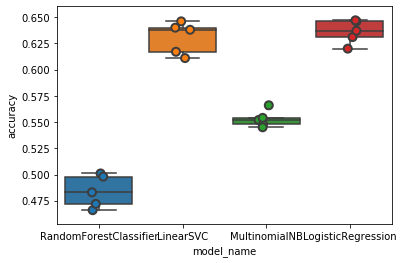

In [478]:
models1 = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df1 = pd.DataFrame(index=range(CV * len(models1)))
entries = []
for model in models1:
    model_name = model.__class__.__name__
    accuracies1 = cross_val_score(model, features2, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies1):
        entries.append((model_name, fold_idx, accuracy))
cv_df1 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df1)
sns.stripplot(x='model_name', y='accuracy', data=cv_df1, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

In [480]:
cv_df1.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.6304
LogisticRegression        0.6362
MultinomialNB             0.5530
RandomForestClassifier    0.4840
Name: accuracy, dtype: float64

In [481]:
model2 = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features2, labels, sample_df.index, test_size=0.33, random_state=0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

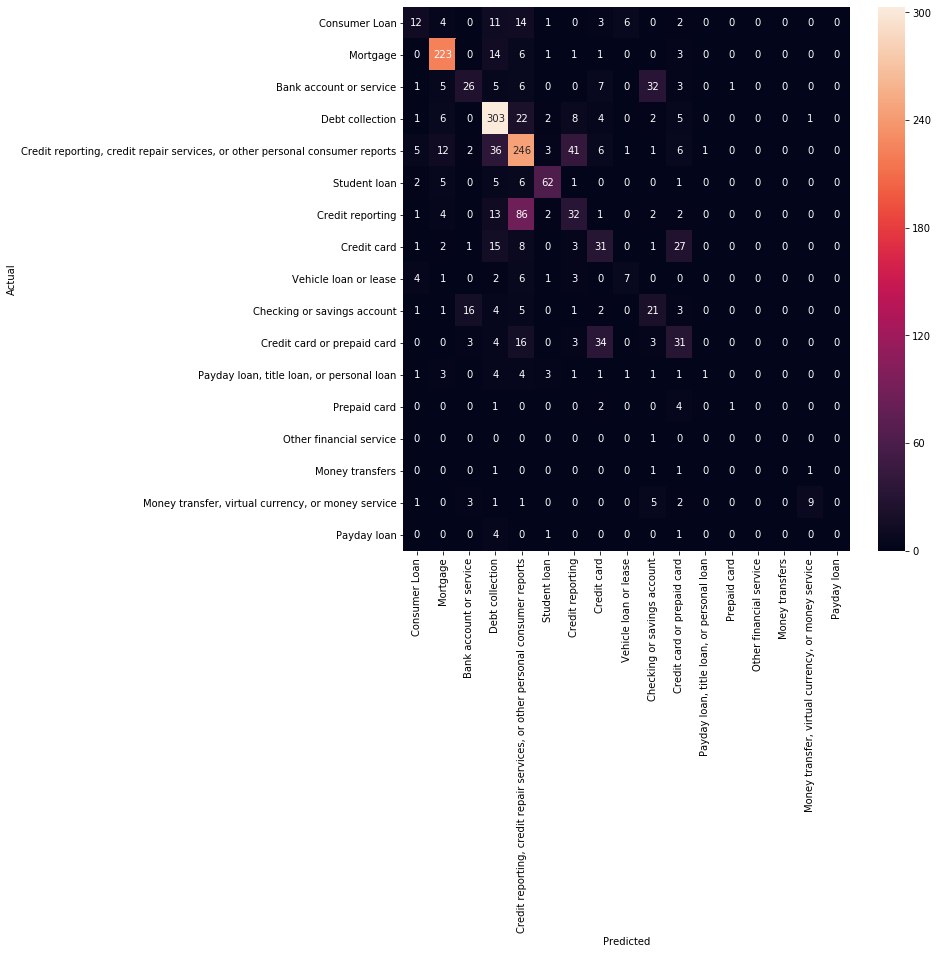

In [483]:
conf_mat = confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [484]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred2, target_names=sample_df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                               Consumer Loan       0.40      0.23      0.29        53
                                                                    Mortgage       0.84      0.90      0.87       249
                                                     Bank account or service       0.51      0.30      0.38        86
                                                             Debt collection       0.72      0.86      0.78       354
Credit reporting, credit repair services, or other personal consumer reports       0.58      0.68      0.63       360
                                                                Student loan       0.82      0.76      0.78        82
                                                            Credit reporting       0.34      0.22      0.27       143
                                                       

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
